In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [4]:
log_reg = LogisticRegression(max_iter=5000)

In [5]:
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.96703297 0.94505495 0.93406593 0.95604396 0.95604396]
Mean CV Accuracy: 0.9516483516483516


In [6]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), 
                       param_grid=param_grid_lr, 
                       cv=5, 
                       scoring='accuracy',
                       n_jobs=-1)

grid_lr.fit(X_train, y_train)

print("Best Parameters (Logistic Regression):", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)

# Test performance
y_pred_lr = grid_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))

Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.9604395604395604
Test Accuracy: 0.9736842105263158


c:\Users\Nitya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=param_dist_rf,
                               n_iter=10,  # try 10 random combos
                               cv=5,
                               scoring='accuracy',
                               random_state=42,
                               n_jobs=-1)

random_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", random_rf.best_params_)
print("Best CV Score:", random_rf.best_score_)

# Test performance
y_pred_rf = random_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best CV Score: 0.9582417582417584
Test Accuracy: 0.956140350877193


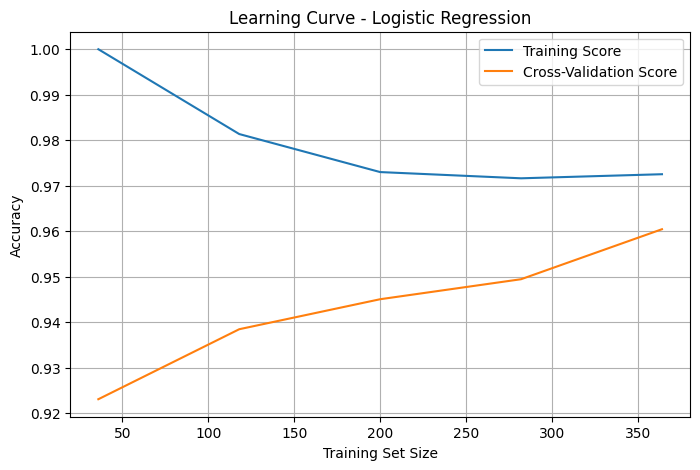

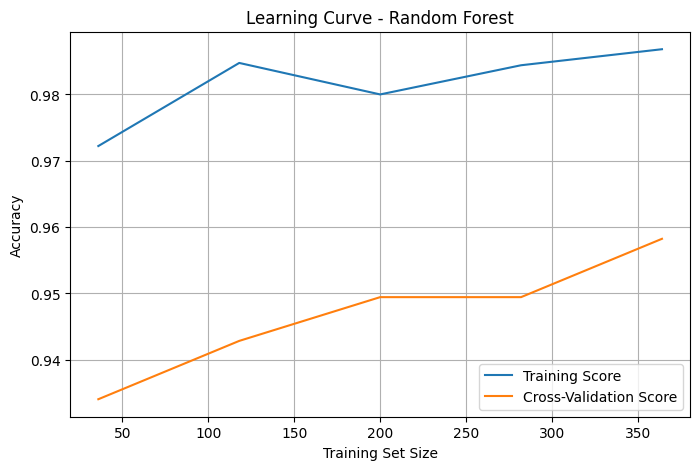

In [8]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, label="Training Score")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_learning_curve(grid_lr.best_estimator_, X_train, y_train, "Learning Curve - Logistic Regression")


plot_learning_curve(random_rf.best_estimator_, X_train, y_train, "Learning Curve - Random Forest")